<h1>Buisness Intelligence - Sheet 2 </h1>
<h2> Camilo Andrés Vega Agudelo - 0000163913 </h2>
<h2> Johan Nicolas Imbachi Nino - 0000179756 </h2>

# Exercise 1.2 Standarization (z-score-normalization)

# a)

Demostration in figure 1

This is a practical Demostration

(array([ 2.,  0., 11.,  9., 17.,  9.,  1.,  0.,  0.,  1.]),
 array([24.23412091, 30.52253467, 36.81094844, 43.0993622 , 49.38777596,
        55.67618972, 61.96460349, 68.25301725, 74.54143101, 80.82984477,
        87.11825854]),
 <BarContainer object of 10 artists>)

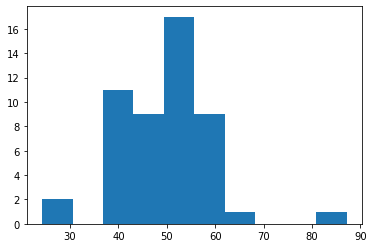

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

a = np.random.normal(50,10,50)
plt.hist(a)

In [2]:
zScore_A = stats.zscore(a)
zScore_A

array([-0.65898291,  1.33681481, -0.15386678, -0.80640947,  0.02299637,
       -0.10124292,  0.65371166, -0.8087621 , -0.10875244, -0.46688933,
       -1.21684373, -0.81426631, -0.67113744, -0.91382594,  0.45199855,
        0.02446909,  0.00643506,  0.53529734,  0.0715732 ,  0.17077048,
        0.83421839,  0.9227031 , -0.82689531,  0.29408137,  1.26570093,
        0.24279219, -0.59417569,  0.21924397,  0.21587586,  0.15266008,
       -2.59168026,  0.07011034, -1.13634778, -0.8492919 ,  0.98181026,
       -2.5795367 , -0.60002827,  0.1525559 , -0.07248504, -0.61410824,
        3.85766364, -0.69246488,  0.06587712, -0.09062719,  1.26185951,
        0.05070521,  1.01452629,  0.75661552,  1.17100756,  0.56454686])

In [3]:
print('Z Score Normalization Mean:', zScore_A.mean(), ', It is real close to 0')
print ('Z Score Normalization Variance: ', zScore_A.var(), 'It is real close to 1')

Z Score Normalization Mean: -8.881784197001253e-18 , It is real close to 0
Z Score Normalization Variance:  0.9999999999999999 It is real close to 1


# Exercise 2.2
Implement two functions <b>normalize(D)</b> and <b>standardize(D)</b>, one to range-normalize and one to z-score-standardize a given matrix D (nparray; output should be a matrix too). Create a normalized and a standardized copy of the Iris data. Check the correlation matrices to see whether the linear dependency among attributes changes by normaliza- tion or standardization. In the two copies, find, respectively, the pair of attributes with the lowest and with the strongest covariance.

In [21]:
import pandas as pd
import numpy as np

iris_dataset = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')
iris_without_species = iris_dataset.drop(columns=['species'])

In [22]:
# 2.2

# def normalize(D, att, xi):
#     myRange = np.ptp(D[att])
#     minValue = np.amin(D[att])
#     x = D[att][xi]
#     return((x-minValue)/myRange)

# normalize(iris_dataset, 'sepal_length', 0)

def normalize(D):
    return((D - D.min(axis = 0)) / (D.max(axis = 0) - D.min(axis = 0)))

def standardize(D):
    return((D - D.mean(axis = 0)) / D.std(axis = 0))

normalized_iris = normalize(iris_without_species)
standarized_iris = standardize(iris_without_species)


# Exercise 2.3 

Write a function scatterdata(M, ax=None) where M is a n × 2 matrix (numpy object)
and ax is an optional axis object (if none is given, the plot shall be created in a new
axis object). Scatter the points of the matrix M into the plot. Then draw two lines that
cross the mean of the data and that have the same direction as the eigenvectors of the
covariance matrix of the given data.
Write a function plotComparisons(M) that creates a n × 3 plot grid in which each row
stands for one pair of two attributes of the given numpy matrix M (do not suppose that
M is a Pandas data frame). Here, n is the number of possible 2-combinations of columns
of M. In the first column, use scatterdata to plot for each pair of attributes the data of
the dataset with the lines marking the eigenvectors. For the other two columns do the
same but normalized (middle column) and standardized (right column) the data.

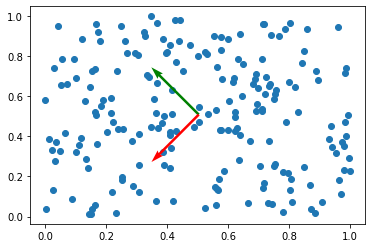

In [4]:
Matrix = np.random.rand(200,2)

def scatterData(M, ax=None):
        plt.scatter(M[:,0], M[:,1])
        meanX = M[:,0].mean()
        meanY = M[:,1].mean()
        
        #Covariance Matrix
        covM = (M.T@M)/(M.shape[0])
        
        eigen_values, eigen_vectors = np.linalg.eig(covM)
        origin = [meanX, meanY]
        
        eigVec1 = eigen_vectors[:,0]
        eigVec2 = eigen_vectors[:,1]
        
        #print(eigVec1, eigVec2)
        
        plt.quiver(*origin, *eigVec1, color=['green'], scale=5)
        plt.quiver(*origin, *eigVec2, color=['red'], scale=5)
        plt.show()
        
        #print(covM, '\n X Mean',meanX, '\n Y Mean', meanY )
        
scatterData(Matrix)

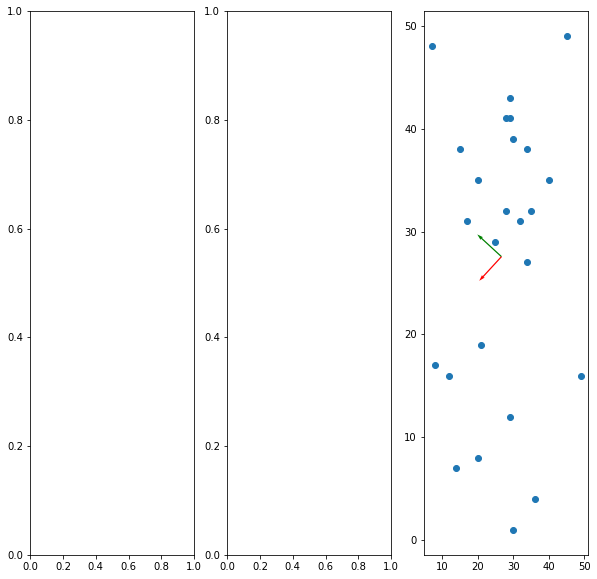

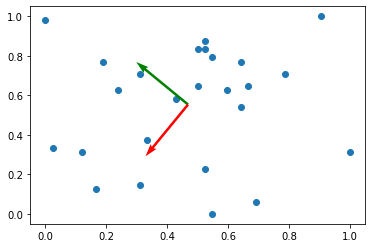

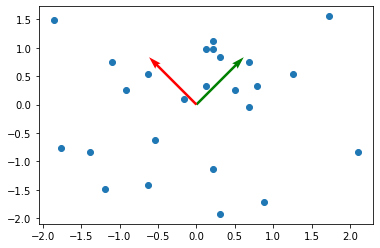

In [15]:
import itertools 
from math import factorial

def normalize(D):
    return((D - D.min(axis = 0)) / (D.max(axis = 0) - D.min(axis = 0)))

def standardize(D):
    return((D - D.mean(axis = 0)) / D.std(axis = 0))

RdmMatrix = np.random.randint(1,50,(25,2))

def plotComparisons(M):
    Comb = int((factorial(RdmMatrix.shape[1]) / (factorial(2)*factorial(RdmMatrix.shape[1]-2))))
    fig, ax1 = plt.subplots(Comb, 3, figsize=(10,10))
    normal = normalize(M)
    standart = standardize(M)
    
    scatterData(M,ax1[0])
    scatterData(normal,ax1[1])
    scatterData(standart,ax1[2])
    
    plt.show()
    
    
plotComparisons(RdmMatrix)